In [13]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [26]:
import warnings

warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('cars.csv')
print(df.head())

                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0         130   
1          Buick Skylark 320  15.0          8         350.0         165   
2         Plymouth Satellite  18.0          8         318.0         150   
3              AMC Rebel SST  16.0          8         304.0         150   
4                Ford Torino  17.0          8         302.0         140   

   Weight  Acceleration  Model Origin Origin Model  Unnamed: 10  Unnamed: 11  
0    3504          12.0     70     US        US 70          NaN    -0.430086  
1    3693          11.5     70     US        US 70          NaN          NaN  
2    3436          11.0     70     US        US 70          NaN          NaN  
3    3433          12.0     70     US        US 70          NaN          NaN  
4    3449          10.5     70     US        US 70          NaN          NaN  


In [8]:
df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,Origin Model,Unnamed: 10,Unnamed: 11
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US,US 70,NaN,-0.430086
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US,US 70,NaN,NaN
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US,US 70,NaN,NaN
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US,US 70,NaN,NaN
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US,US 70,NaN,NaN


In [9]:
df['Weight'].cummax()

0      3504
1      3693
2      3693
3      3693
4      3693
       ... 
401    5140
402    5140
403    5140
404    5140
405    5140
Name: Weight, Length: 406, dtype: int64

In [10]:
df['Weight'].cummin()

0      3504
1      3504
2      3436
3      3433
4      3433
       ... 
401    1613
402    1613
403    1613
404    1613
405    1613
Name: Weight, Length: 406, dtype: int64

In [11]:
df['Weight'].cumprod()

0                    3504
1                12940272
2             44462774592
3         152640705174336
4      526457792146284864
              ...        
401                     0
402                     0
403                     0
404                     0
405                     0
Name: Weight, Length: 406, dtype: int64

In [18]:
unique_car_names_origin = df.drop_duplicates( subset = ['Car', 'Origin'])
unique_car_names_origin.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,Origin Model,Unnamed: 10,Unnamed: 11
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US,US 70,NaN,-0.430086
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US,US 70,NaN,NaN
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US,US 70,NaN,NaN
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US,US 70,NaN,NaN
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US,US 70,NaN,NaN


In [20]:
unique_car_names_origin['Car'].value_counts(sort = True, normalize = True)

Car
Chevrolet Chevelle Malibu          0.003247
Buick Regal Sport Coupe (turbo)    0.003247
Oldsmobile Starfire SX             0.003247
Plymouth Sapporo                   0.003247
Toyota Celica GT Liftback          0.003247
                                     ...   
Mazda RX3                          0.003247
Datsun 610                         0.003247
Toyota Camry                       0.003247
Oldsmobile Vista Cruiser           0.003247
Chevy S-10                         0.003247
Name: proportion, Length: 308, dtype: float64

In [24]:
avg_car = df.groupby('Car')['Weight'].mean()
avg_car

Car
AMC Ambassador Brougham    3821.0
AMC Ambassador DPL         3850.0
AMC Ambassador SST         3672.0
AMC Concord                3106.5
AMC Concord DL             3035.0
                            ...  
Volvo 145e (sw)            2933.0
Volvo 244DL                2945.0
Volvo 245                  3150.0
Volvo 264gl                3140.0
Volvo Diesel               3160.0
Name: Weight, Length: 308, dtype: float64

In [27]:
car_stats = df.groupby('Car')['Weight'].agg([np.min, np.max, np.mean])
car_stats

,min,max,mean
Car,,,
AMC Ambassador Brougham,3821,3821,3821.0
AMC Ambassador DPL,3850,3850,3850.0
AMC Ambassador SST,3672,3672,3672.0
AMC Concord,3003,3210,3106.5
AMC Concord DL,3035,3035,3035.0
...,...,...,...
Volvo 145e (sw),2933,2933,2933.0
Volvo 244DL,2945,2945,2945.0
Volvo 245,3150,3150,3150.0


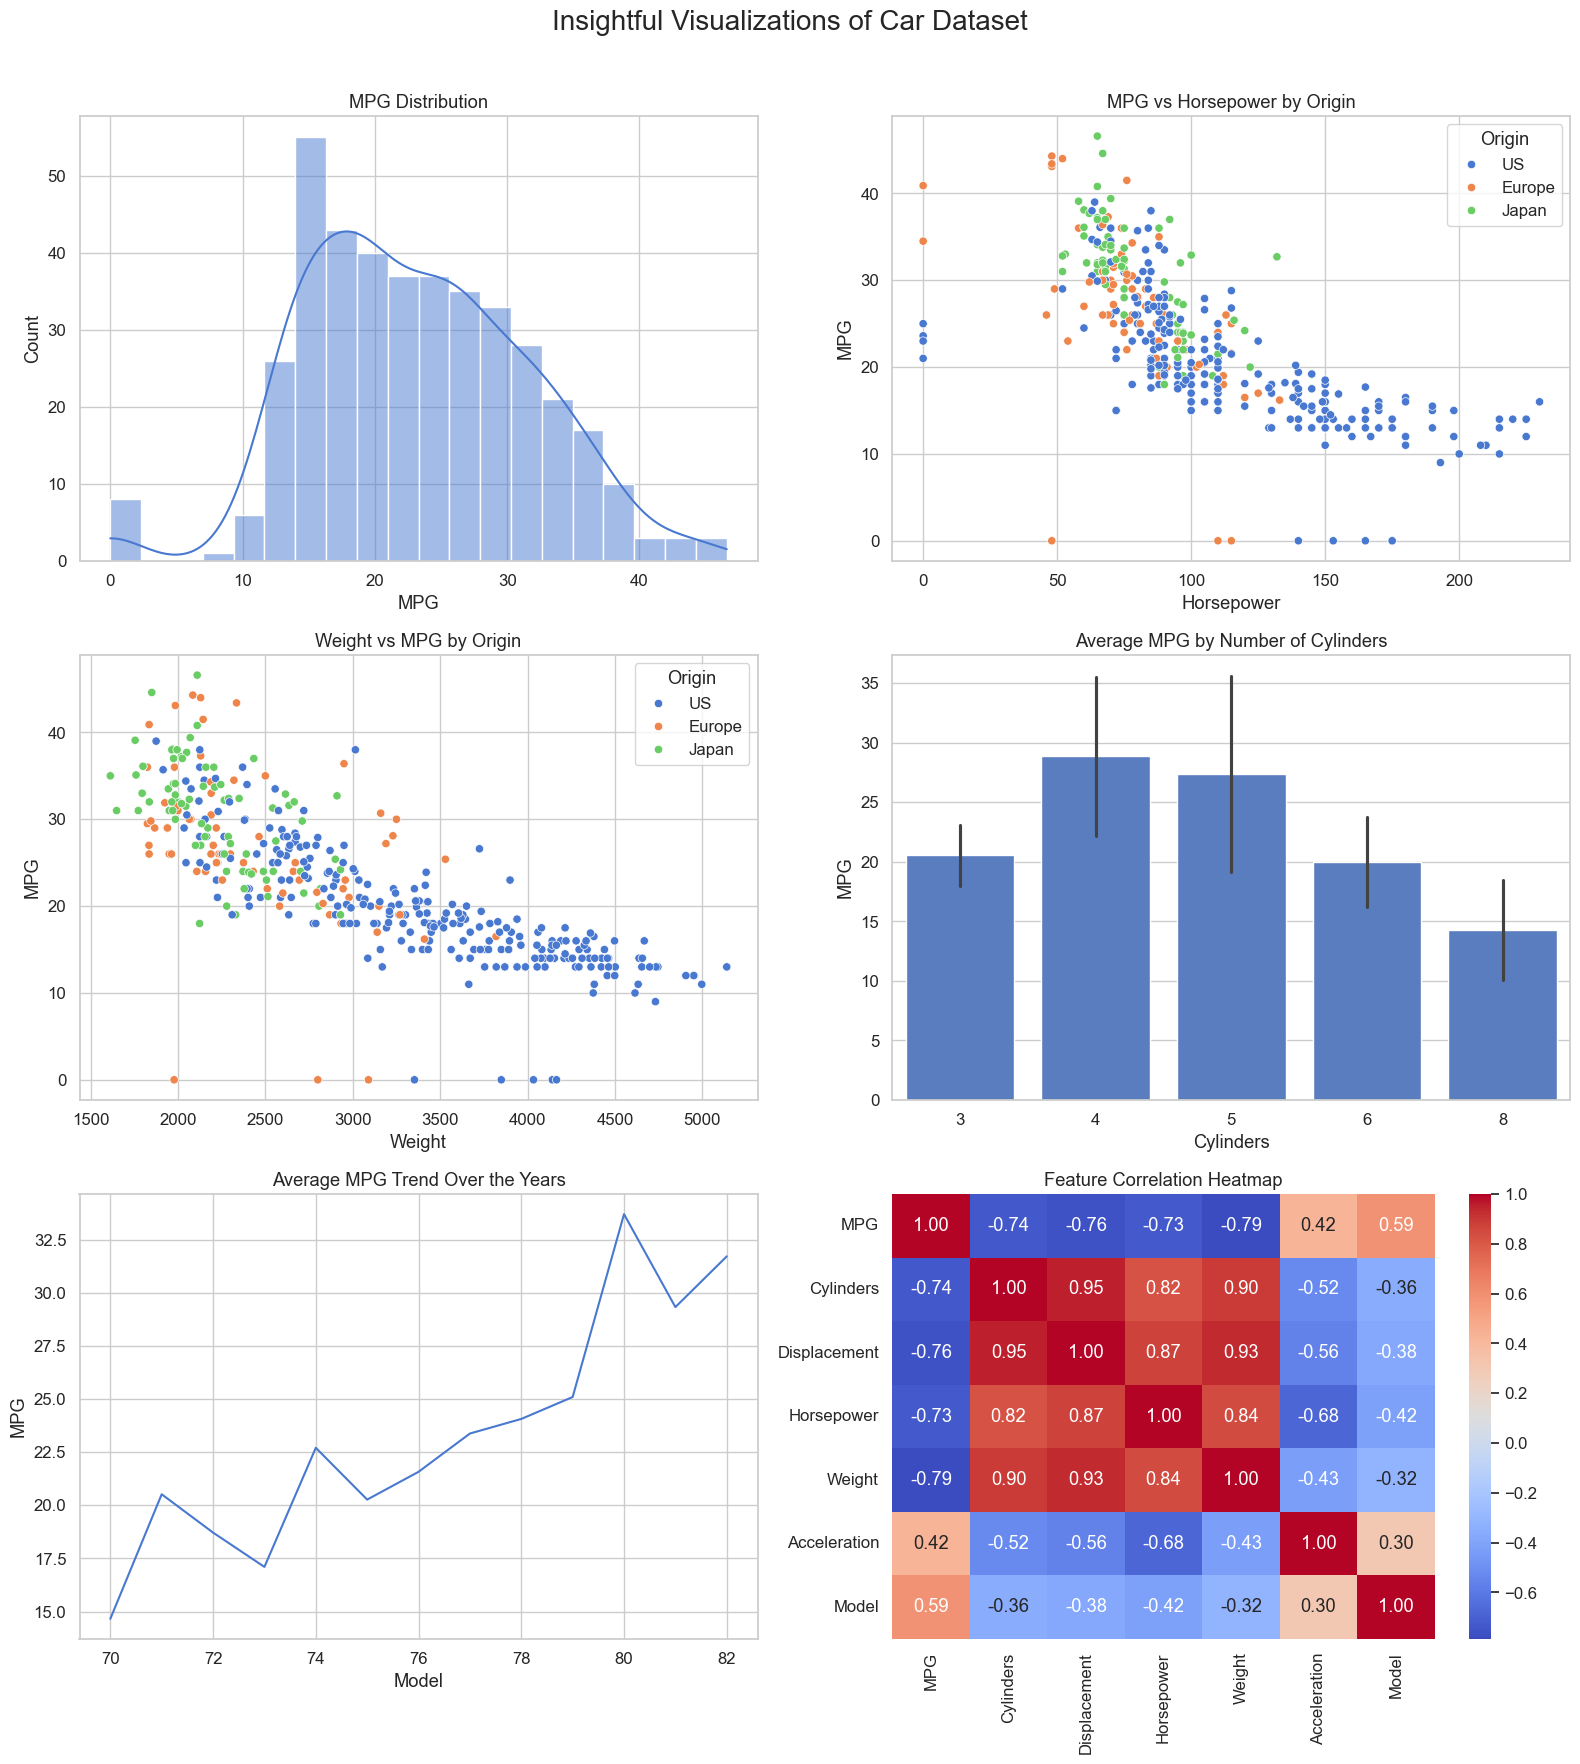

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Drop irrelevant columns
df_clean = df.drop(columns=['Unnamed: 10', 'Unnamed: 11'], errors='ignore')

# Set the visual theme
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Create subplots for 6 visualizations
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Insightful Visualizations of Car Dataset', fontsize=20)

# 1. MPG Distribution
sns.histplot(df_clean['MPG'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('MPG Distribution')

# 2. MPG vs Horsepower by Origin
sns.scatterplot(data=df_clean, x='Horsepower', y='MPG', hue='Origin', ax=axes[0, 1])
axes[0, 1].set_title('MPG vs Horsepower by Origin')

# 3. Weight vs MPG by Origin
sns.scatterplot(data=df_clean, x='Weight', y='MPG', hue='Origin', ax=axes[1, 0])
axes[1, 0].set_title('Weight vs MPG by Origin')

# 4. Average MPG by Cylinders
sns.barplot(data=df_clean, x='Cylinders', y='MPG', estimator=np.mean, ci='sd', ax=axes[1, 1])
axes[1, 1].set_title('Average MPG by Number of Cylinders')

# 5. Average MPG Trend Over the Years
mpg_trend = df_clean.groupby('Model')['MPG'].mean().reset_index()
sns.lineplot(data=mpg_trend, x='Model', y='MPG', ax=axes[2, 0])
axes[2, 0].set_title('Average MPG Trend Over the Years')

# 6. Correlation Heatmap
numeric_df = df_clean.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[2, 1])
axes[2, 1].set_title('Feature Correlation Heatmap')

# Final layout adjustments
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


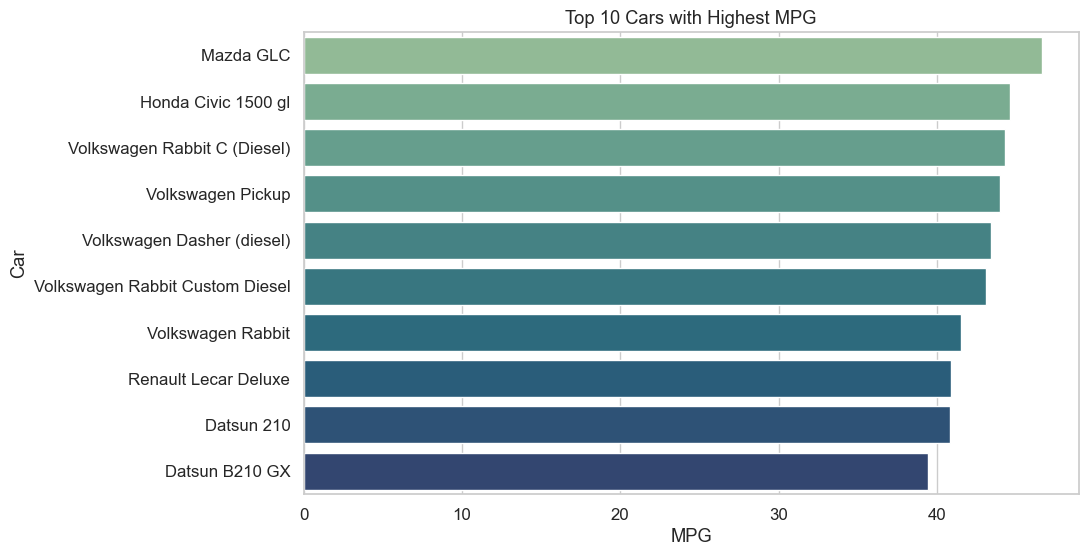

In [30]:
top_mpg = df_clean.sort_values(by='MPG', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_mpg, x='MPG', y='Car', palette='crest')
plt.title('Top 10 Cars with Highest MPG')
plt.xlabel('MPG')
plt.ylabel('Car')
plt.show()

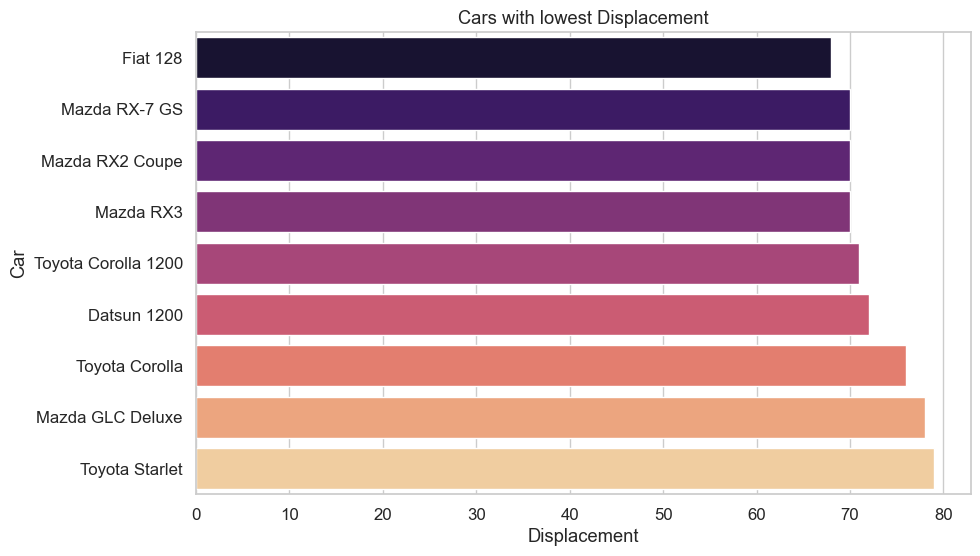

In [38]:
top_mpg = df_clean.sort_values(by='Displacement', ascending=True).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_mpg, x='Displacement', y='Car', palette='magma')
plt.title('Cars with lowest Displacement')
plt.xlabel('Displacement')
plt.ylabel('Car')
plt.show()


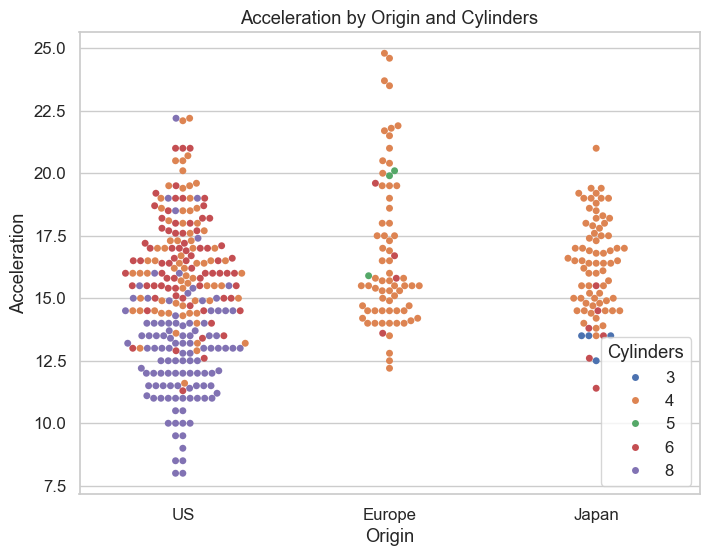

In [39]:
plt.figure(figsize=(8, 6))
sns.swarmplot(data=df_clean, x='Origin', y='Acceleration', hue='Cylinders', palette='deep')
plt.title('Acceleration by Origin and Cylinders')
plt.show()


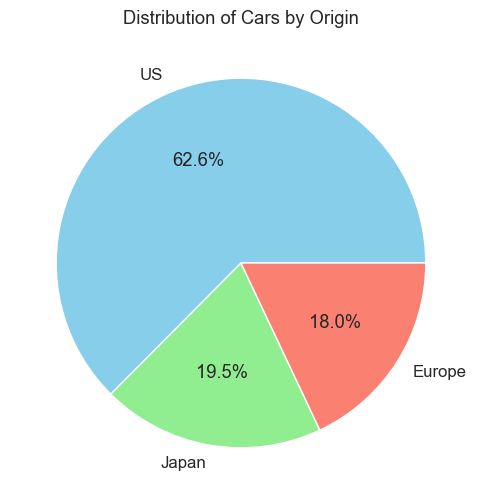

In [42]:
plt.figure(figsize=(8, 6))
df['Origin'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Distribution of Cars by Origin')
plt.ylabel('')
plt.show()

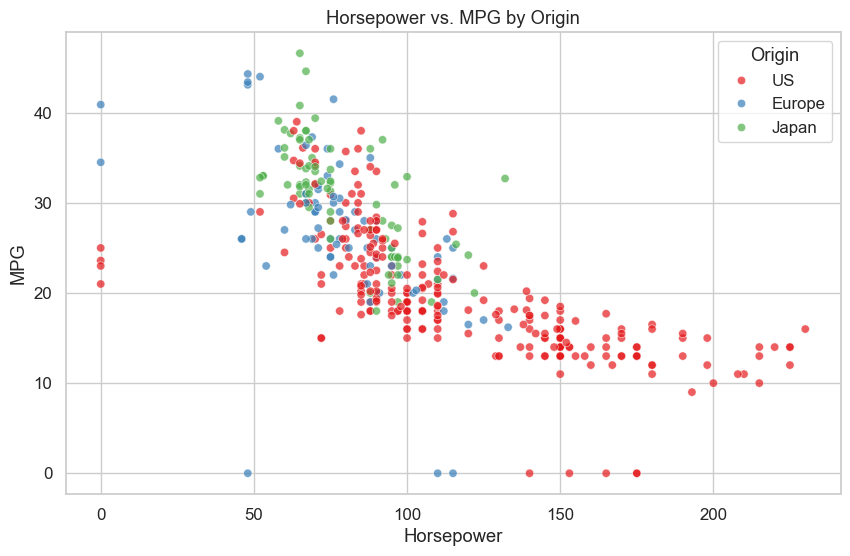

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Horsepower', y='MPG', data=df, hue='Origin', palette='Set1', alpha=0.7)
plt.title('Horsepower vs. MPG by Origin')
plt.show()
